# Analysis of Dementia:

Dementia is a neurodegenerative disorder entailing that the disease progresses with aging. It is hallmarked by impaired ability to reason and to recollect as well as emotional, language, and motivation difficulties. Due to its neurological nature, it often has systemic complications that affect daily life. Depending on the form of dementia, the treatment involves the use of pharmacologic acetylcholinesterase inhibitors. For Alzheimer's, there have been newer, more novel treatments that target Amyloid plaque and Tau protein build-up in the brain.

The ability to predict risk for its development is critical from a medical and societal perspective, as it allows for its mitigation. 
The dataset is the collection of three studies, SCANS, RUN DMC, and ASPS.
The file was retrieved from kaggle: https://www.kaggle.com/datasets/fatemehmehrparvar/dementia

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
# Load and preview data
dementia = pd.read_csv("/home/wells/code/dementia/OPTIMAL_combined_3studies_6feb2020.csv")
dementia.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


In [3]:
# Info on dataset and types
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [4]:
# Describe dataset
dementia.describe()

,ID,age,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,SVD Simple Score,SVD Amended Score,Fazekas
count,1842.000000,1842.000000,1808.000000,1842.000000,1842.000000,1634.000000,1574.000000,1534.000000,1842.000000,1165.000000,1165.000000,1842.000000
mean,29897.929967,65.952588,0.045354,0.062975,11.139522,-0.063088,-0.066649,-0.026860,0.122693,0.719313,1.491845,1.311075
std,67056.874773,8.923488,0.208137,0.242984,2.983946,0.785264,0.871836,0.677071,0.328173,0.932063,1.623277,0.799495
min,1.000000,38.000000,0.000000,0.000000,1.000000,-5.200000,-2.680000,-2.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,60.000000,0.000000,0.000000,9.000000,-0.436896,-0.670805,-0.476881,0.000000,0.000000,0.000000,1.000000
50%,612.500000,66.151393,0.000000,0.000000,10.000000,0.130000,-0.020000,0.006667,0.000000,0.000000,1.000000,1.000000
75%,1713.250000,73.000000,0.000000,0.000000,13.000000,0.484327,0.550000,0.423333,0.000000,1.000000,2.000000,2.000000
max,211301.000000,90.000000,1.000000,1.000000,24.000000,2.350000,2.730000,1.853333,1.000000,3.000000,7.000000,3.000000


From this we can infer that the majority (90%) of the participants in these studies have not been diagnosed with dementia. Early onset of symptoms occurs at 65+, with the mean age of 66, demonstrating the potential for a predictive model based on multiple factors, such as education, gender, diabetes, hypercholesterolemia, and Fazekas scores.

Percentage null:
 ID                       0.000000
age                      0.000000
gender                   0.000000
dementia                 1.845820
dementia_all             0.000000
educationyears           0.000000
EF                      11.292074
PS                      14.549403
Global                  16.720955
diabetes                 0.000000
smoking                  0.597177
hypertension             0.000000
hypercholesterolemia     0.000000
lacunes_num              0.000000
fazekas_cat              0.000000
study                    0.000000
study1                   0.000000
SVD Simple Score        36.753529
SVD Amended Score       36.753529
Fazekas                  0.000000
lac_count                0.000000
CMB_count                0.000000
dtype: float64


<Axes: >

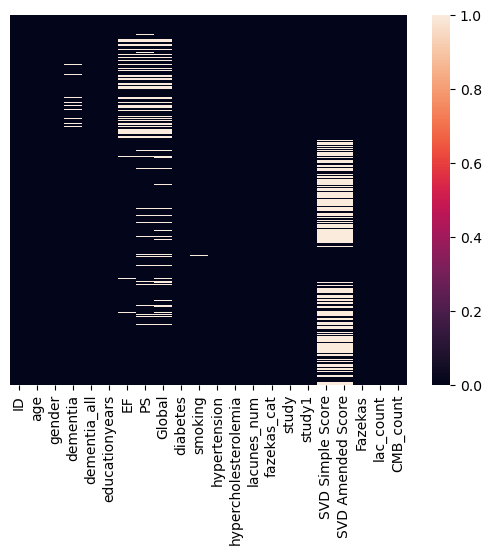

In [5]:
# Percentage of null values
null_data = dementia.isnull().sum() * 100 / dementia.shape[0]
print("Percentage null:\n", null_data)
sns.heatmap(dementia.isnull(), yticklabels=False)

In [6]:
# Determine duplicates
dementia.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1837    False
1838    False
1839    False
1840    False
1841    False
Length: 1842, dtype: bool

## Data Cleaning:

In this analysis, missing data points will be dropped rather filled in with 0 or some other value to maintain accuracy and precision in results.

<Axes: >

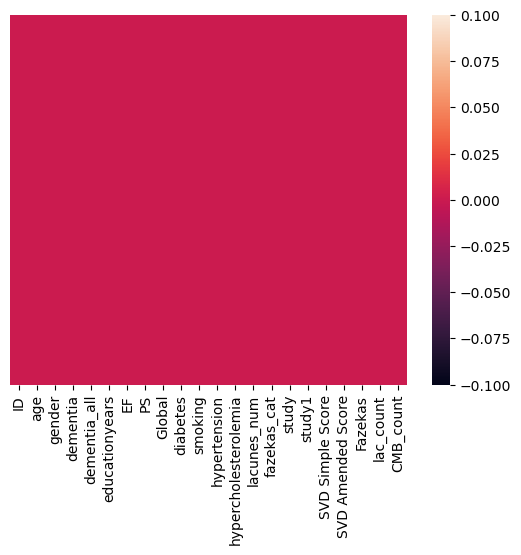

In [7]:
# drop null and NaN values
dementia.dropna(subset=['dementia','EF','PS','Global','smoking','SVD Simple Score', 'SVD Amended Score'], inplace=True)
sns.heatmap(dementia.isnull(), yticklabels=False)

The education level column will be removed from the dataset as education, while very important for neural health, ultimately has little-to-no bearing on the development of dementia.

In [19]:
dementia = dementia.drop('educationyears', axis=1)

Next, the datatypes of critical variables will be converted from integers to floats. Float was chosen as the ideal datatype due to the nature of the dataset: precision is of utmost importance in this analysis, so converting to integers would reduce this precision.

In [20]:
# Convert ints to floats

dementia.dtypes

ID                        int64
age                     float64
gender                   object
dementia                float64
dementia_all              int64
EF                      float64
PS                      float64
Global                  float64
diabetes                  int64
smoking                  object
hypertension             object
hypercholesterolemia     object
lacunes_num              object
fazekas_cat              object
study                    object
study1                   object
SVD Simple Score        float64
SVD Amended Score       float64
Fazekas                   int64
lac_count                object
CMB_count                object
dtype: object

## Visualizing Outliers:

### Distribution of Age

/opt/anaconda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


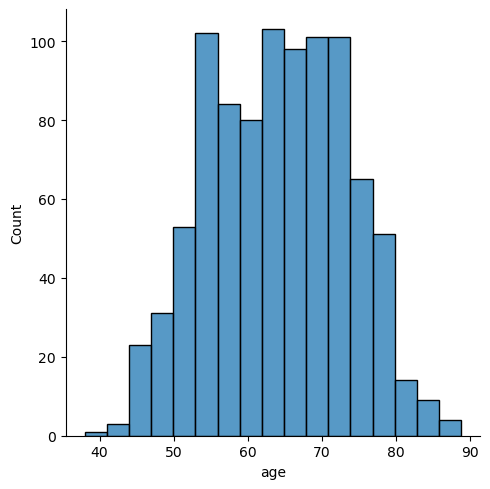

In [9]:
sns.displot(data=dementia, x = 'age')

### Boxplot of Dementia Diagnosis by Age

Text(0, 0.5, 'Age')

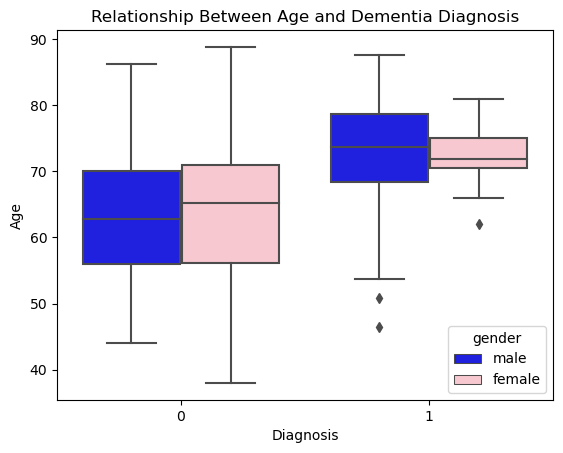

In [10]:
sns.boxplot(data = dementia, x = 'dementia_all', y = 'age', hue = 'gender', palette = ['blue','pink'])
plt.title("Relationship Between Age and Dementia Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Age")

In [11]:
dementia[['dementia_all','age']].corr()

,dementia_all,age
dementia_all,1.000000,0.206373
age,0.206373,1.000000


### Distribution of Fazekas Score

The Fazekas score represents the extent of white matter lesions in the brain.

/opt/anaconda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


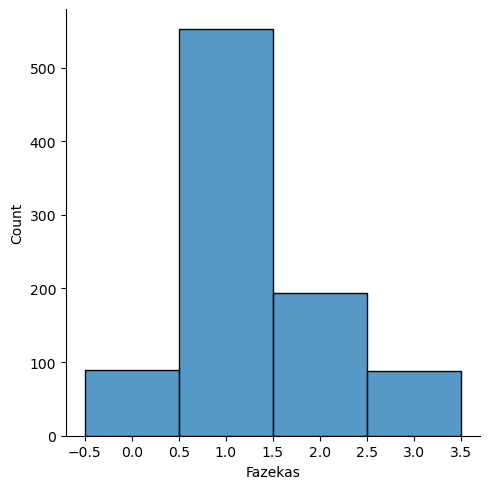

In [40]:
# Visualize distribution of score
sns.displot(data=dementia, x='Fazekas', discrete=True)

### Boxplot of Fazekas by Diagnosis

Text(0, 0.5, 'Fazekas Score')

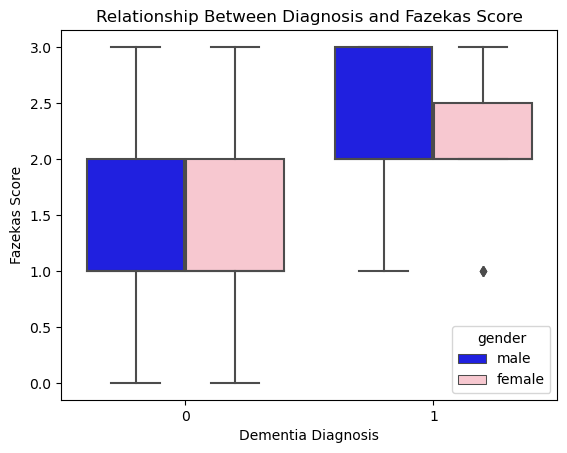

In [24]:
# Visualize Fazekas by Diagnosis
sns.boxplot(data = dementia, x = 'dementia_all', y = 'Fazekas', hue = 'gender', palette = ['blue', 'pink'])
plt.title("Relationship Between Diagnosis and Fazekas Score")
plt.xlabel("Dementia Diagnosis")
plt.ylabel("Fazekas Score")

In [15]:
dementia[['dementia_all','Fazekas']].corr()

,dementia_all,Fazekas
dementia_all,1.00000,0.23465
Fazekas,0.23465,1.00000


### Boxplot of Fazekas score by Ages

Text(0, 0.5, 'Age')

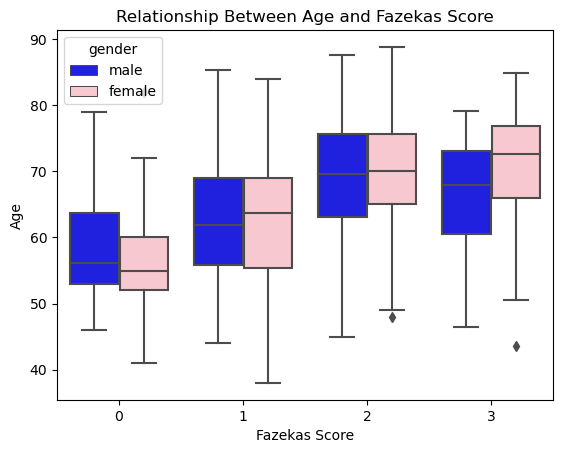

In [26]:
sns.boxplot(data = dementia, x = 'Fazekas', y = 'age', hue = 'gender', palette = ['blue','pink'])
plt.title("Relationship Between Age and Fazekas Score")
plt.xlabel("Fazekas Score")
plt.ylabel("Age")
#sns.violinplot(data = dementia, x = 'Fazekas', y = 'age', hue = 'hypercholesterolemia', palette = ['red', 'green'])

In [8]:
dementia[['Fazekas', 'age']].corr()

,Fazekas,age
Fazekas,1.000000,0.363558
age,0.363558,1.000000


The Fazekas score is weakly and positively correlated with age. 

### Boxplots of Dementia by Cognitive Measures

Text(0, 0.5, 'Executive Functioning Rating')

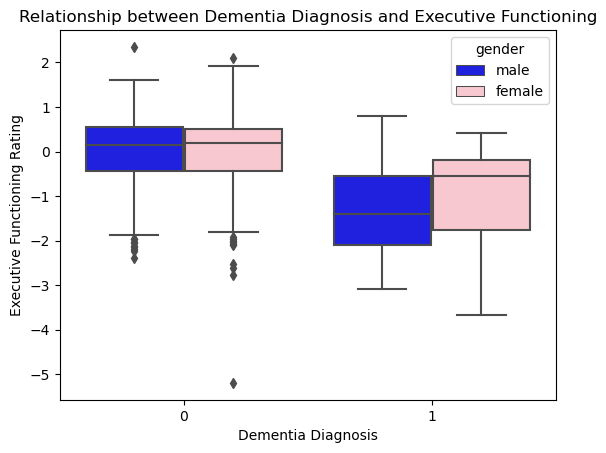

In [41]:
sns.boxplot(data = dementia, x = 'dementia_all', y = 'EF', hue = 'gender', palette = ['blue', 'pink'])
plt.title("Relationship between Dementia Diagnosis and Executive Functioning")
plt.xlabel("Dementia Diagnosis")
plt.ylabel("Executive Functioning Rating")

In [33]:
dementia[['dementia_all','EF']].corr()

,dementia_all,EF
dementia_all,1.00000,-0.29893
EF,-0.29893,1.00000


Text(0, 0.5, 'Processing Speed')

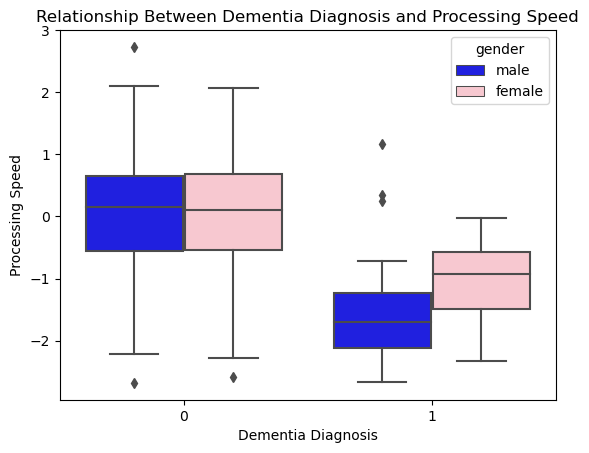

In [42]:
sns.boxplot(data = dementia, x = 'dementia_all', y = 'PS', hue = 'gender', palette = ['blue', 'pink'])
plt.title("Relationship Between Dementia Diagnosis and Processing Speed")
plt.xlabel("Dementia Diagnosis")
plt.ylabel("Processing Speed")

In [27]:
dementia[['dementia_all','PS']].corr()

,dementia_all,PS
dementia_all,1.000000,-0.328334
PS,-0.328334,1.000000


Text(0, 0.5, 'SVD Simple Score')

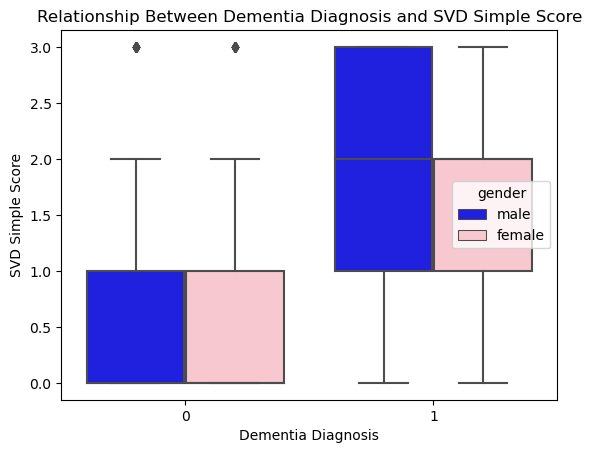

In [43]:
sns.boxplot(data = dementia, x = 'dementia_all', y = 'SVD Simple Score', hue = 'gender', palette = ['blue', 'pink'])
plt.title("Relationship Between Dementia Diagnosis and SVD Simple Score")
plt.xlabel("Dementia Diagnosis")
plt.ylabel("SVD Simple Score")

In [28]:
dementia[['dementia_all','SVD Simple Score']].corr()

,dementia_all,SVD Simple Score
dementia_all,1.000000,0.293387
SVD Simple Score,0.293387,1.000000


Text(0, 0.5, 'SVD Amended Score')

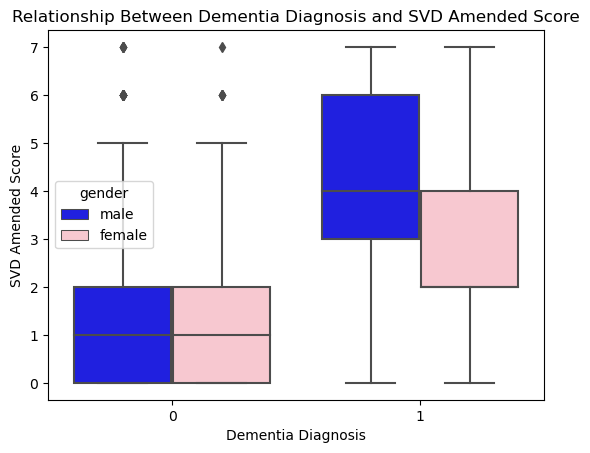

In [44]:
sns.boxplot(data = dementia, x = 'dementia_all', y = 'SVD Amended Score', hue = 'gender', palette = ['blue', 'pink'])
plt.title("Relationship Between Dementia Diagnosis and SVD Amended Score")
plt.xlabel("Dementia Diagnosis")
plt.ylabel("SVD Amended Score")

In [29]:
dementia[['dementia_all','SVD Amended Score']].corr()

,dementia_all,SVD Amended Score
dementia_all,1.000000,0.328759
SVD Amended Score,0.328759,1.000000


Thus far, the correlations have been weak to weak-moderate in strength. There are minimal outliers, such that it does not warrant further data cleaning before the analysis.

## Predictive Model of Dementia:

In [38]:
# Load Machine Learning packages
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split